<a href="https://colab.research.google.com/github/Susena-V/AI-ML-Coding-Club/blob/main/Last_Letter_Concatenation_Sentences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install and import the requirements

In [16]:
!pip install groq

In [17]:
from google.colab import userdata
key = userdata.get('GROQ_API_KEY')

In [18]:
from groq import Groq

client = Groq(api_key = key)


In [19]:
from time import sleep
import pandas as pd
import matplotlib.pyplot as plt

## Load the data and Prepare it

In [20]:
data = pd.read_csv('/content/drive/MyDrive/College/Research/LRM Research/Sentences_Dataset_no_punctuation.csv')

In [21]:
data

,Unnamed: 0,Length,Text
0,0,2,Birds sing
1,1,3,Cats chase mice
2,2,4,The sun rises daily
3,3,5,The dog barked at strangers
4,4,6,Children play happily in the park
...,...,...,...
94,94,96,In the heart of the metropolis a cacophony of ...
95,95,97,In the heart of a bustling city nestled betwee...
96,96,98,The old library stood at the edge of town its ...
97,97,99,The old library stood at the edge of town its ...


In [22]:
last_letters = []

for sentence in data['Text']:
  words = sentence.split()

  lls = [word[-1] for word in words]

  last_letters.append(''.join(lls))

In [23]:


last_letters

['sg',
 'see',
 'ensy',
 'egdts',
 'nyynek',
 'eydrker',
 'eddegawy',
 'etsdnerty',
 'eydedehhet',
 'eelyddenhrs',
 'edewygnetefg',
 'esddeeronrlpt',
 'edetpygtdlestn',
 'edreygetotgtrrp',
 'edoedfengytewett',
 'eeatrordgersfgtds',
 'eteengelgtsyoeeste',
 'edntnehgadgedoysent',
 'ysyegryordsseetsrndn',
 'endpltgaxydotyeeeygln',
 'edhpfelngtysndnedreydn',
 'endwengeyhsfedkgedfatry',
 'ngeydatlglslsdystdsmgsdd',
 'ygeeneerydoeesgmdgmmhslyd',
 'ettsgeetgxrsdgcmletdyhsdse',
 'hedydrshsgdgnedfoaeeefgsere',
 'gelesmesdghsgsgsdgeerdsnedye',
 'efydhsmlshgghcsdesoestdeeddyy',
 'netfegsaytdgshegsgyoatferndnly',
 'eengeeyddeegsdgtegtnhsysemdnhet',
 'yrgysdeoenystfeldseeoenntsreedrn',
 'Alesyetsalnoarerenasrotfalnelmnle',
 'naekleptsagtedrneetdoytrtesdderena',
 'n9etefeeftynsnasdnsydenrdnsteicenta',
 'Arfehlrdylisfnhygeyfaerotensneyadfyo',
 'setsensdhetdnyaernayddsetyngstdreefem',
 'reefenneetnoelwhsasfsfnwslsecsgoewegdt',
 'hetdyesddegegsftsdlsehfesdheptrgattfndn',
 'setsensdnlnhetdnyaernayddsety

In [24]:
data['output_true'] = pd.Series(last_letters)

In [25]:
data = data.rename(columns={'Text':'input'})

## Evaluating and Visualizing

### How to evaluate?


1. See if it equals
2. Calculate the length till which it matches - then normalize by total length of the sequence - plot this against length of sentence
 So the x-axis is the length of the sentence and and the y-axis is percentage match
3. The same case but from the end - cause sometimes suffixes are captured better




In [26]:
import matplotlib.pyplot as plt

def evaluate_and_plot(df):
    # Helper functions
    def evaluate_accuracy(df):
        return df['output_true'].str.replace(" ", "") == df['output_llm'].str.replace(" ", "")

    def evaluate_string_length(df):
        match_lengths = []
        for true, pred in zip(df['output_true'], df['output_llm']):
            true = true.replace(" ", "")
            pred = pred.replace(" ", "")
            match_len = 0
            for t, p in zip(true, pred):
                if t == p:
                    match_len += 1
                else:
                    break
            normalized = match_len / max(len(true), 1)
            match_lengths.append(normalized)
        return match_lengths

    def evaluate_string_match_from_end(df):
        match_lengths = []
        for true, pred in zip(df['output_true'], df['output_llm']):
            true = true.replace(" ", "")
            pred = pred.replace(" ", "")
            match_len = 0
            for t, p in zip(true[::-1], pred[::-1]):
                if t == p:
                    match_len += 1
                else:
                    break
            normalized = match_len / max(len(true), 1)
            match_lengths.append(normalized)
        return match_lengths

    # Evaluation
    df['exact_match'] = evaluate_accuracy(df)
    df['normalized_match_length'] = evaluate_string_length(df)
    df['normalized_match_from_end'] = evaluate_string_match_from_end(df)
    df['input_length'] = df['input'].apply(lambda x: len(x.split()))

    # Plot 1: Exact Match Accuracy vs Sentence Length
    plt.figure(figsize=(10, 5))
    plt.scatter(df['input_length'], df['exact_match'], alpha=0.6)
    plt.title("Exact Match Accuracy vs Sentence Length")
    plt.xlabel("Number of Words in Input")
    plt.ylabel("Exact Match (0 or 1)")
    plt.ylim(0, 1.05)
    plt.grid(True)
    plt.show()

    # Plot 2: Normalized Match Length vs Sentence Length
    plt.figure(figsize=(10, 5))
    plt.plot(df['input_length'], df['normalized_match_length'], marker='o', linestyle='-', alpha=0.7)
    plt.title("Normalized Match Length vs Sentence Length")
    plt.xlabel("Number of Words in Input")
    plt.ylabel("Normalized Match from Start")
    plt.ylim(0, 1.05)
    plt.grid(True)
    plt.show()

    # Plot 3: Normalized Match from End vs Sentence Length
    plt.figure(figsize=(10, 6))
    plt.plot(df['input_length'], df['normalized_match_from_end'], marker='o', linestyle='-', color='green', alpha=0.7)
    plt.title("Normalized Match from End vs Sentence Length", fontsize=14)
    plt.xlabel("Number of Words in Input", fontsize=12)
    plt.ylabel("Normalized Match from End", fontsize=12)
    plt.ylim(0, 1.05)
    plt.grid(True)
    plt.show()

    return df


## One shot prompting the LLM for Last Letter Concatenation

### LLM chatcompletion function to iterate through the sentences

In [27]:
def get_llm_output(input_text, prompt):
    try:
        prompt = f"""{prompt}

Q: {input_text}
A:"""

        chat_completion = client.chat.completions.create(
            messages=[

                {
                    "role": "system",
                    "content": "You are a helpful assistant. Follow the pattern shown and return only the correct answer without any explanation.",
                },  # To prevent it from explaining

                {
                    "role": "user",
                    "content": prompt,
                }
            ],
            model="gemma2-9b-it",  # Or "llama-3-8b-8192", etc.
            temperature=0,
            max_completion_tokens=20,
            top_p=1,
            stop=None,
            stream=False,
        )

        return chat_completion.choices[0].message.content.strip()

    except Exception as e:
        print(f"Error processing input: {input_text}\nError: {e}")
        return "ERROR"

### Function to iterate through the samples

In [28]:
def iterate_llm_through_samples(df, prompt):
  for idx, row in df.iterrows():
    input_text = row["input"]
    output = get_llm_output(input_text, prompt)
    df.at[idx, "output_llm"] = output
    sleep(0.01)

  return df


### Gemma2 - 9b - it

#### Prompt 1 : Prompt of length 2

Using sentence in the dataset

In [29]:
prompt1 = """
Return the last letter of each word in the input.

Q: Birds sing
A: sg

Now, perform the same task on the following:
"""
data1 = iterate_llm_through_samples(data, prompt1)
data1


,Unnamed: 0,Length,input,output_true,output_llm
0,0,2,Birds sing,sg,sg
1,1,3,Cats chase mice,see,ce
2,2,4,The sun rises daily,ensy,ly
3,3,5,The dog barked at strangers,egdts,ers
4,4,6,Children play happily in the park,nyynek,lyrk
...,...,...,...,...,...
94,94,96,In the heart of the metropolis a cacophony of ...,netfesayfsderegfrseefgsderfsgrnatmgsrssgetyfey...,nceexistence
95,95,97,In the heart of a bustling city nestled betwee...,netfagydngsdgsdateehydyytsanrssdsfnsetfdrdnerg...,y y s s s s y s s y
96,96,98,The old library stood at the edge of town its ...,edydteefnslsgnegtesnsfsdsmyrfedadhesgrsgesgrge...,y n n w d r d r g y
97,97,99,The old library stood at the edge of town its ...,edydteefnslsgynegtesnsfsdsmyrfedadhesgrsgesgrg...,y t n n r r g s d e


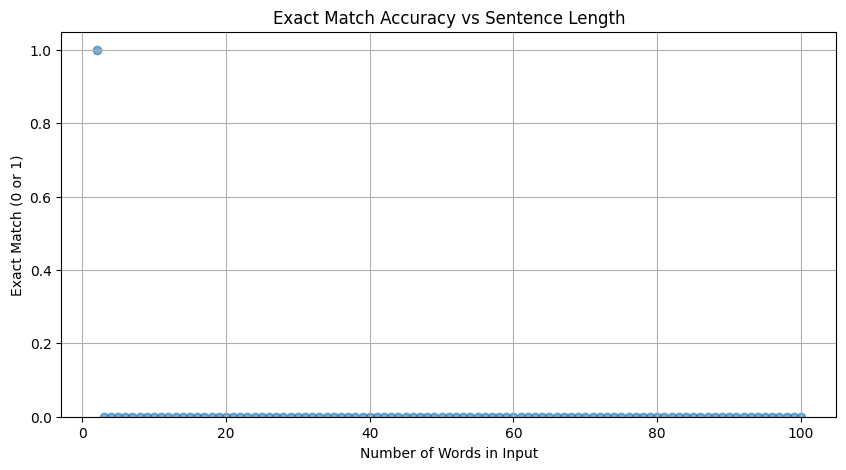

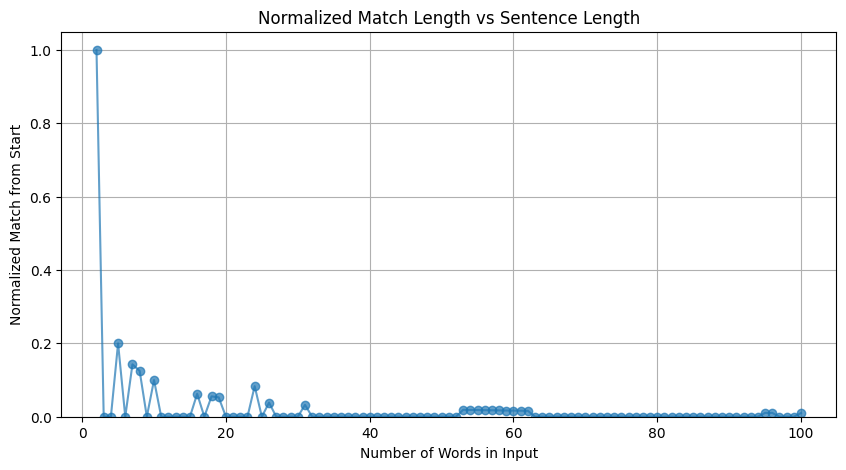

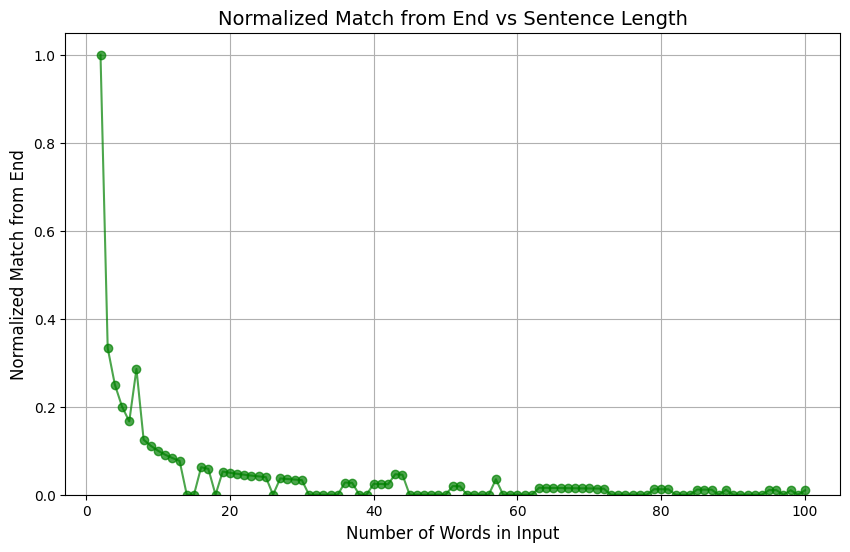

In [30]:
data1 = evaluate_and_plot(data1)

#### Prompt 2 - A sentece of length 10

Using a sentence present in the corpus

In [31]:
prompt2 = """
Return the last letter of each word in the input.

Q: He carefully painted the old fence with fresh white paint
A: eydedehhet

Now, perform the same task on the following:

"""

data2 = iterate_llm_through_samples(data, prompt2)
data2


,Unnamed: 0,Length,input,output_true,output_llm,exact_match,normalized_match_length,normalized_match_from_end,input_length
0,0,2,Birds sing,sg,ng,True,1.000000,1.000000,2
1,1,3,Cats chase mice,see,esce,False,0.000000,0.333333,3
2,2,4,The sun rises daily,ensy,y,False,0.000000,0.250000,4
3,3,5,The dog barked at strangers,egdts,sger,False,0.200000,0.200000,5
4,4,6,Children play happily in the park,nyynek,nark,False,0.000000,0.166667,6
...,...,...,...,...,...,...,...,...,...
94,94,96,In the heart of the metropolis a cacophony of ...,netfesayfsderegfrseefgsderfsgrnatmgsrssgetyfey...,eecnheairthtthhseeeesnntn,False,0.010417,0.010417,96
95,95,97,In the heart of a bustling city nestled betwee...,netfagydngsdgsdateehydyytsanrssdsfnsetfdrdnerg...,ywaysdbyitwostht,False,0.000000,0.000000,97
96,96,98,The old library stood at the edge of town its ...,edydteefnslsgnegtesnsfsdsmyrfedadhesgrsgesgrge...,wnwosnloeworlmeeeenr,False,0.000000,0.010204,98
97,97,99,The old library stood at the edge of town its ...,edydteefnslsgynegtesnsfsdsmyrfedadhesgrsgesgrg...,wnwosfhtnleiey,False,0.000000,0.000000,99


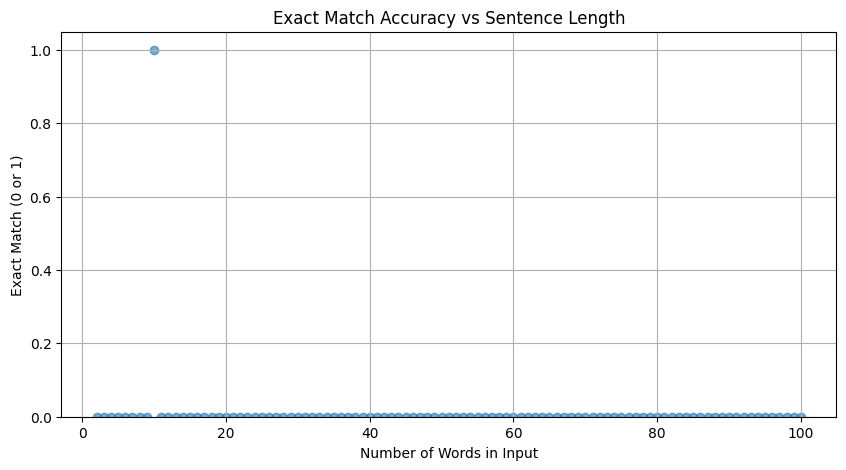

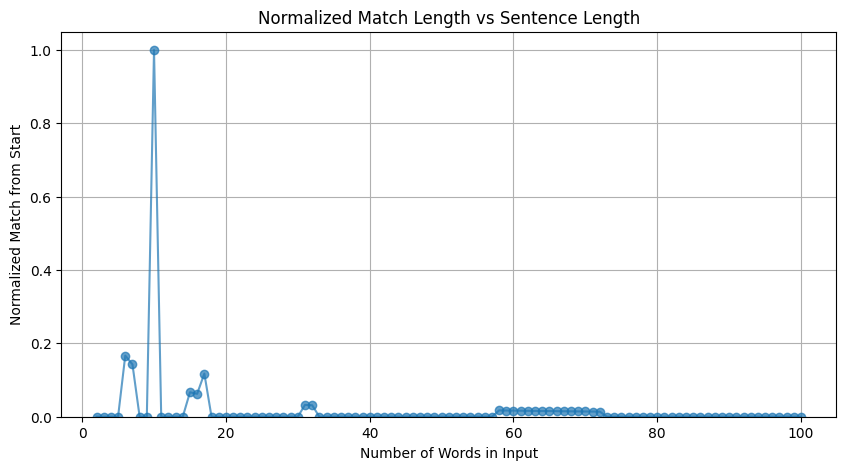

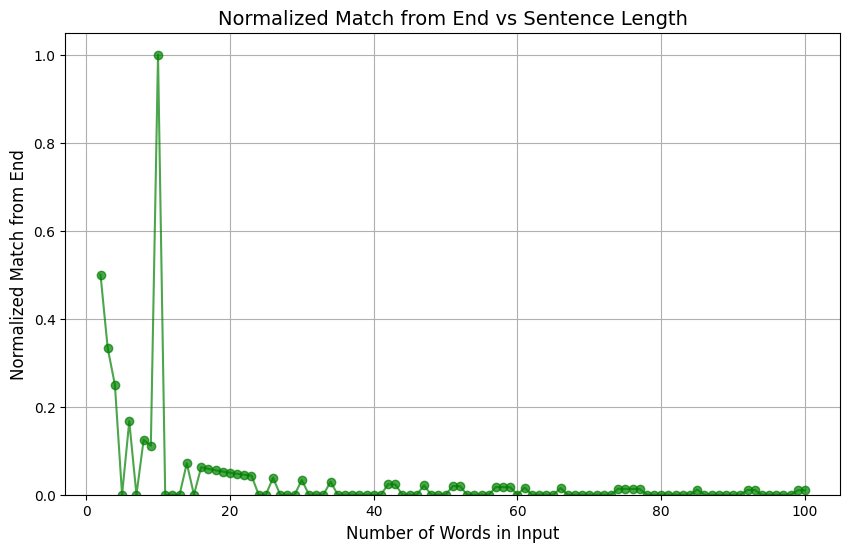

In [32]:
data2 = evaluate_and_plot(data2)

#### Prompt 3 : Listing an example each up till 10 characters

Sentences are present in the dataset

In [33]:
prompt3 = """
Return the last letter of each word in the input.

Q: Birds sing
A: sg

Q: Cats chase mice
A: see

Q: The sun rises daily
A: ensy

Q: The dog barked at strangers
A: egdts

Q: Children play happily in the park
A: nyynek

Q: She quickly finished her homework before dinner
A: eydrker

Q: The child laughed while chasing a yellow butterfly
A: eddegawy

Q: The bright stars twinkled in the clear night sky
A: etsdnerty

Q: He carefully painted the old fence with fresh white paint
A: eydedehhet


Now, perform the same task on the following:

"""

data3 = iterate_llm_through_samples(data, prompt3)
data3


,Unnamed: 0,Length,input,output_true,output_llm,exact_match,normalized_match_length,normalized_match_from_end,input_length
0,0,2,Birds sing,sg,sg,False,0.000000,0.500000,2
1,1,3,Cats chase mice,see,ce,False,0.000000,0.333333,3
2,2,4,The sun rises daily,ensy,y,False,0.000000,0.250000,4
3,3,5,The dog barked at strangers,egdts,gstrangers,False,0.000000,0.000000,5
4,4,6,Children play happily in the park,nyynek,nky,False,0.166667,0.166667,6
...,...,...,...,...,...,...,...,...,...
94,94,96,In the heart of the metropolis a cacophony of ...,netfesayfsderegfrseefgsderfsgrnatmgsrssgetyfey...,ncece,False,0.000000,0.000000,96
95,95,97,In the heart of a bustling city nestled betwee...,netfagydngsdgsdateehydyytsanrssdsfnsetfdrdnerg...,ybyitwseeaiirthtneee,False,0.000000,0.000000,97
96,96,98,The old library stood at the edge of town its ...,edydteefnslsgnegtesnsfsdsmyrfedadhesgrsgesgrge...,nwonlryy,False,0.000000,0.000000,98
97,97,99,The old library stood at the edge of town its ...,edydteefnslsgynegtesnsfsdsmyrfedadhesgrsgesgrg...,ytlwiohldnreerwneee,False,0.000000,0.010101,99


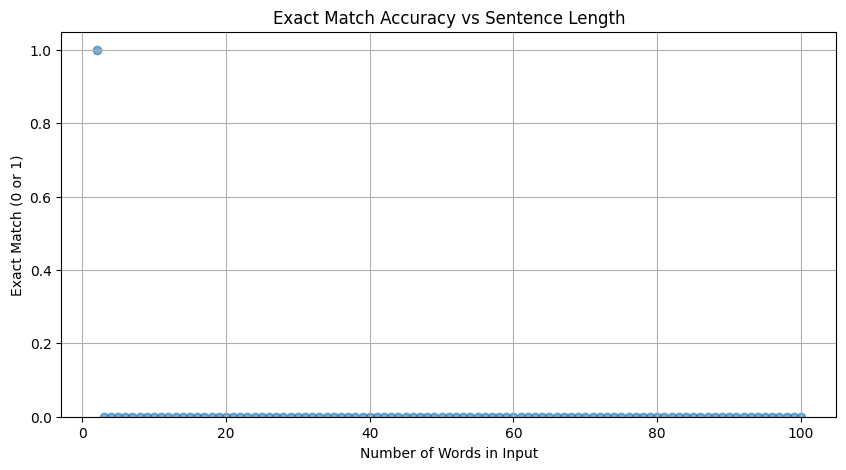

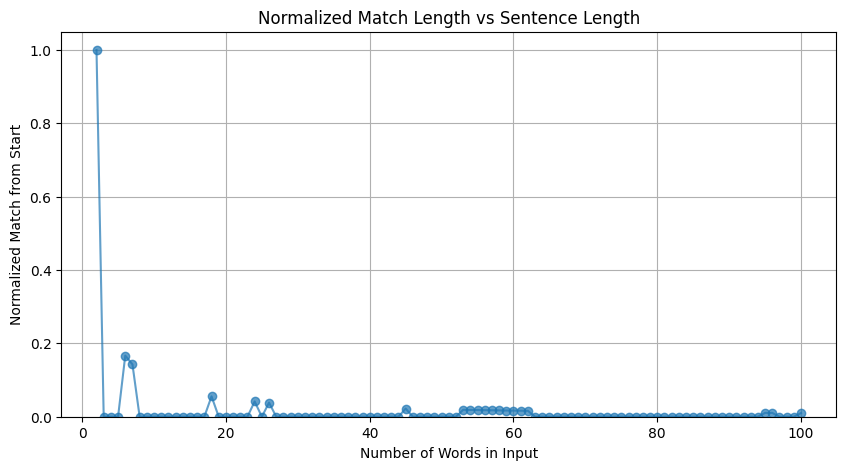

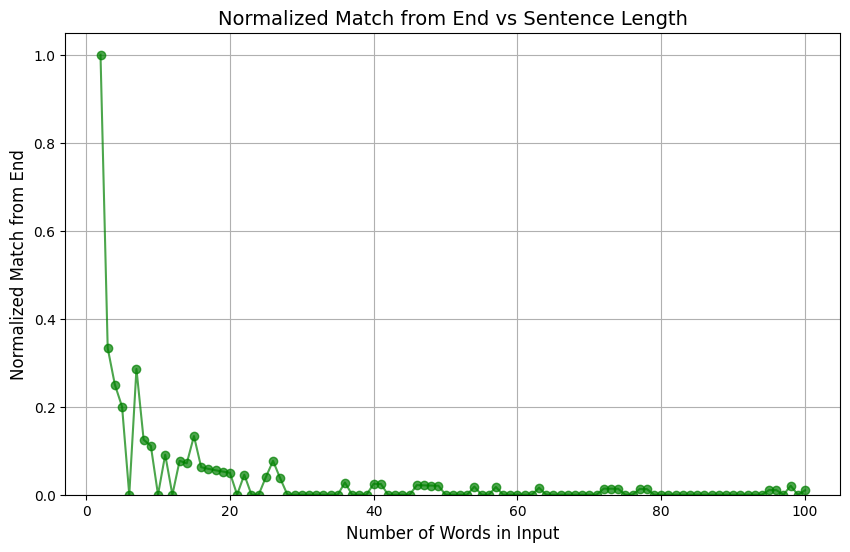

In [34]:
data3 = evaluate_and_plot(data3)

#### Prompt 4 - A sentence of length 10

Using a sentence not present in the corpus

In [35]:

prompt4 = """
Return the last letter of each word in the input.

Q: Frogs jump high over calm lakes biting wind near dusk
A: sphrmsgdrk

Now, perform the same task on the following:

"""

data4 = iterate_llm_through_samples(data, prompt4)
data4


,Unnamed: 0,Length,input,output_true,output_llm,exact_match,normalized_match_length,normalized_match_from_end,input_length
0,0,2,Birds sing,sg,ng,True,1.000000,1.000000,2
1,1,3,Cats chase mice,see,es,False,0.000000,0.333333,3
2,2,4,The sun rises daily,ensy,y,False,0.000000,0.250000,4
3,3,5,The dog barked at strangers,egdts,ers,False,0.000000,0.200000,5
4,4,6,Children play happily in the park,nyynek,nark,False,0.166667,0.000000,6
...,...,...,...,...,...,...,...,...,...
94,94,96,In the heart of the metropolis a cacophony of ...,netfesayfsderegfrseefgsderfsgrnatmgsrssgetyfey...,eecn,False,0.010417,0.010417,96
95,95,97,In the heart of a bustling city nestled betwee...,netfagydngsdgsdateehydyytsanrssdsfnsetfdrdnerg...,ywsreeayts,False,0.000000,0.000000,97
96,96,98,The old library stood at the edge of town its ...,edydteefnslsgnegtesnsfsdsmyrfedadhesgrsgesgrge...,eowntn s t h d r l d y,False,0.000000,0.020408,98
97,97,99,The old library stood at the edge of town its ...,edydteefnslsgynegtesnsfsdsmyrfedadhesgrsgesgrg...,ywnwoslftteea,False,0.000000,0.000000,99


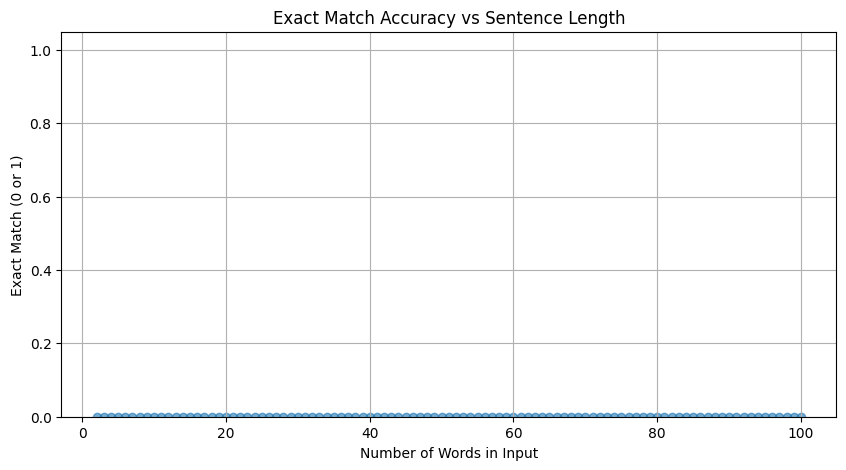

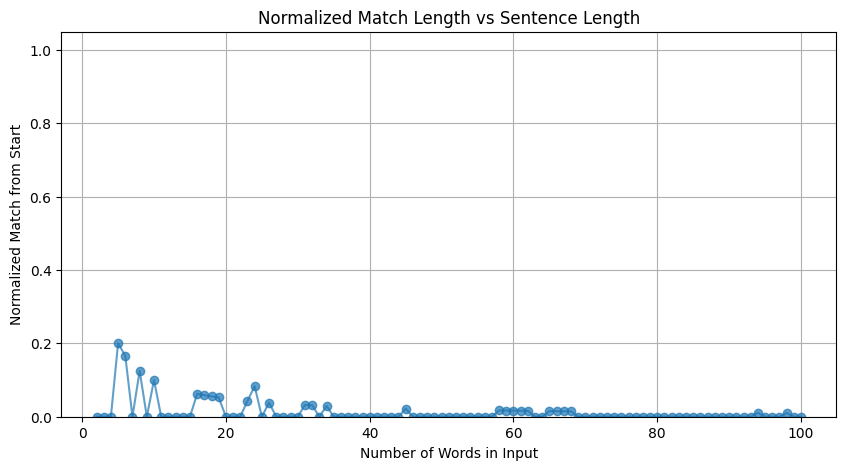

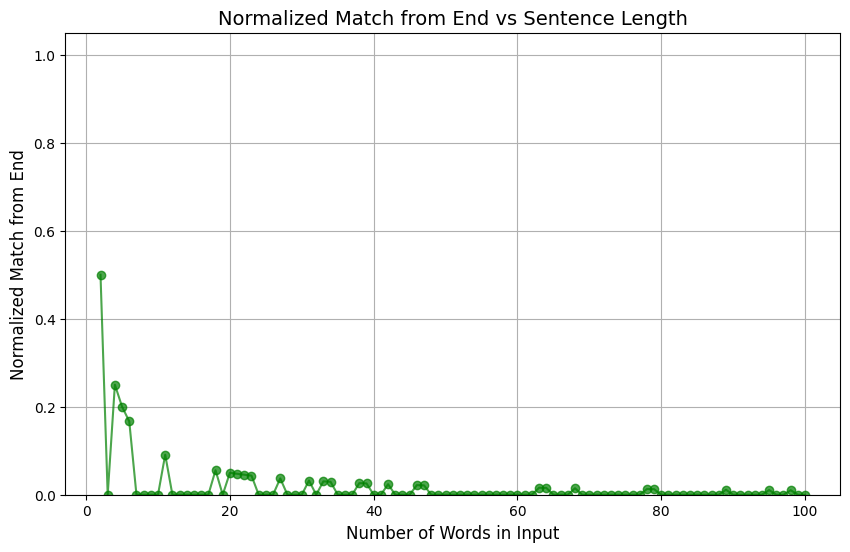

In [36]:
data4 = evaluate_and_plot(data4)

#### Prompt 5 : Listing an example each up till 10 characters
sentences not present in the dataset

In [37]:
prompt5 = """
Return the last letter of each word in the input.

Q: Hawks glide
A: se

Q: Bridges are burned
A: sed

Q: The winter is harsh
A: ersh

Q: Falcons dive in the sky
A: senty

Q: Waiting for you is not fun
A: grustn

Q: The sun set behind the quiet hills
A: entdets

Q: The baby giggled when the toy lit up
A: eydneytp

Q: She painted the walls with bright blue colors
A: edeshtes

Q: The scientist carefully recorded every detail of the experiment
A: etydylfet

Now, perform the same task on the following:

"""

data5 = iterate_llm_through_samples(data, prompt5)
data5


,Unnamed: 0,Length,input,output_true,output_llm,exact_match,normalized_match_length,normalized_match_from_end,input_length
0,0,2,Birds sing,sg,ng,False,0.000000,0.500000,2
1,1,3,Cats chase mice,see,ce,False,0.000000,0.000000,3
2,2,4,The sun rises daily,ensy,y,False,0.000000,0.250000,4
3,3,5,The dog barked at strangers,egdts,s,False,0.200000,0.200000,5
4,4,6,Children play happily in the park,nyynek,k,False,0.166667,0.166667,6
...,...,...,...,...,...,...,...,...,...
94,94,96,In the heart of the metropolis a cacophony of ...,netfesayfsderegfrseefgsderfsgrnatmgsrssgetyfey...,ncece,False,0.000000,0.000000,96
95,95,97,In the heart of a bustling city nestled betwee...,netfagydngsdgsdateehydyytsanrssdsfnsetfdrdnerg...,ybyitwthtne,False,0.000000,0.000000,97
96,96,98,The old library stood at the edge of town its ...,edydteefnslsgnegtesnsfsdsmyrfedadhesgrsgesgrge...,ytownitswnghtnsidehseofwldEmmarhtrhssng,False,0.010204,0.010204,98
97,97,99,The old library stood at the edge of town its ...,edydteefnslsgynegtesnsfsdsmyrfedadhesgrsgesgrg...,ytownstlyghtieyyoflworldednameairinabceoreay,False,0.000000,0.000000,99


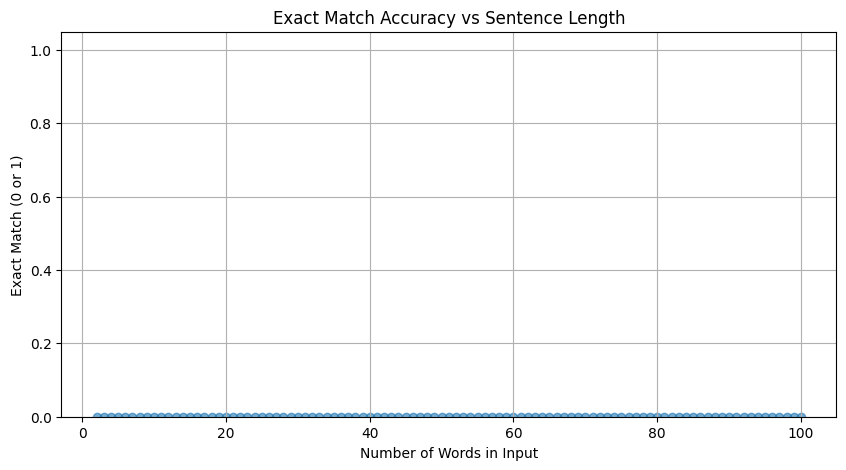

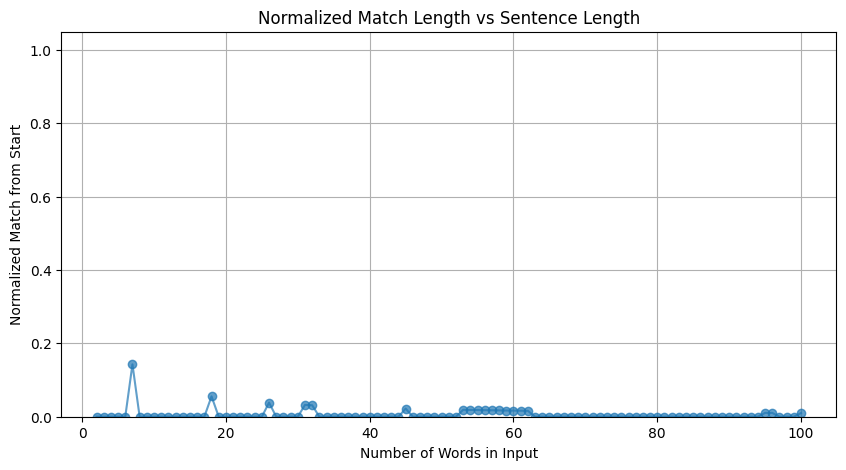

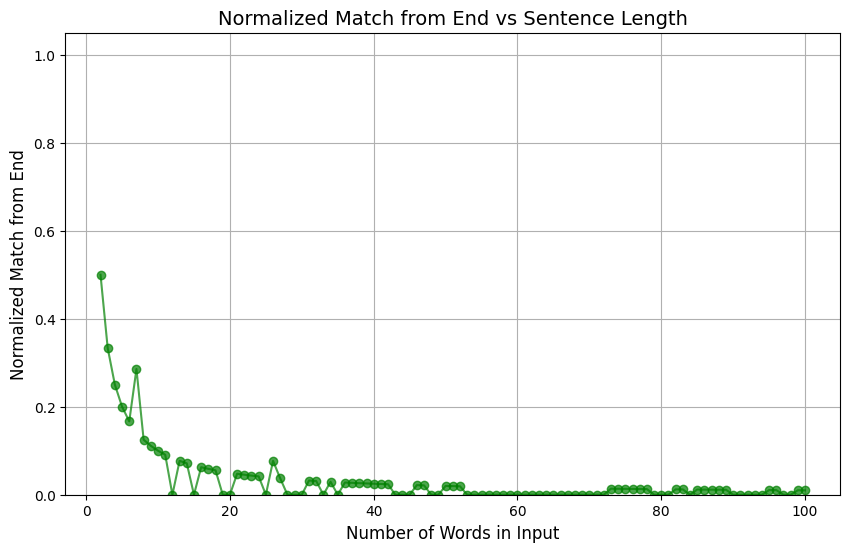

In [38]:
data5 = evaluate_and_plot(data5)

#### Prompt 6 : Prompt of length 2
sentence not present in the dataset

In [39]:
prompt6 = """
Return the last letter of each word in the input.

Q: Hawks glide
A: se

Now, perform the same task on the following:

"""

data6 = iterate_llm_through_samples(data, prompt6)
data6


,Unnamed: 0,Length,input,output_true,output_llm,exact_match,normalized_match_length,normalized_match_from_end,input_length
0,0,2,Birds sing,sg,ng,False,0.000000,0.500000,2
1,1,3,Cats chase mice,see,eice,False,0.000000,0.333333,3
2,2,4,The sun rises daily,ensy,y,False,0.000000,0.250000,4
3,3,5,The dog barked at strangers,egdts,rs,False,0.000000,0.200000,5
4,4,6,Children play happily in the park,nyynek,y,False,0.000000,0.166667,6
...,...,...,...,...,...,...,...,...,...
94,94,96,In the heart of the metropolis a cacophony of ...,netfesayfsderegfrseefgsderfsgrnatmgsrssgetyfey...,nce,False,0.010417,0.010417,96
95,95,97,In the heart of a bustling city nestled betwee...,netfagydngsdgsdateehydyytsanrssdsfnsetfdrdnerg...,y y s s s y s s y s,False,0.000000,0.000000,97
96,96,98,The old library stood at the edge of town its ...,edydteefnslsgnegtesnsfsdsmyrfedadhesgrsgesgrge...,y n n w d n d r g d,False,0.000000,0.000000,98
97,97,99,The old library stood at the edge of town its ...,edydteefnslsgynegtesnsfsdsmyrfedadhesgrsgesgrg...,y n n f n d d r d e,False,0.000000,0.010101,99


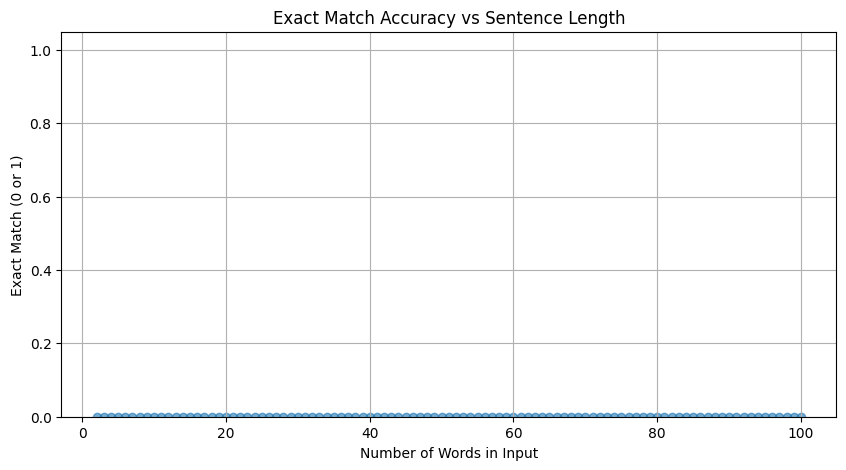

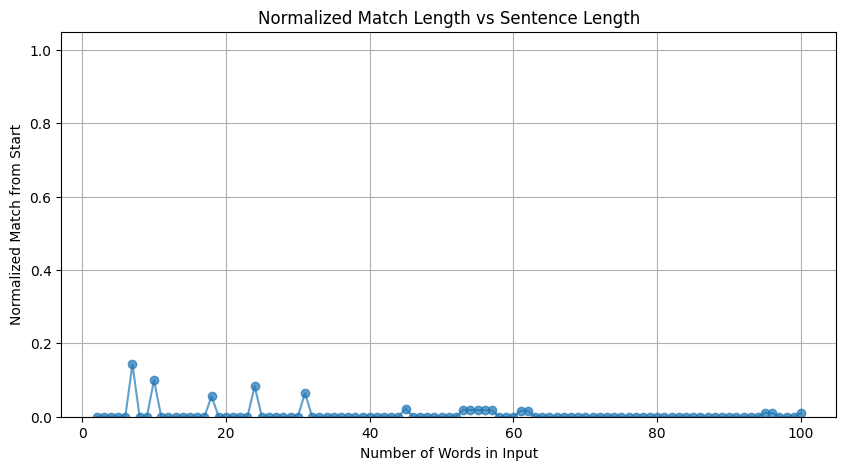

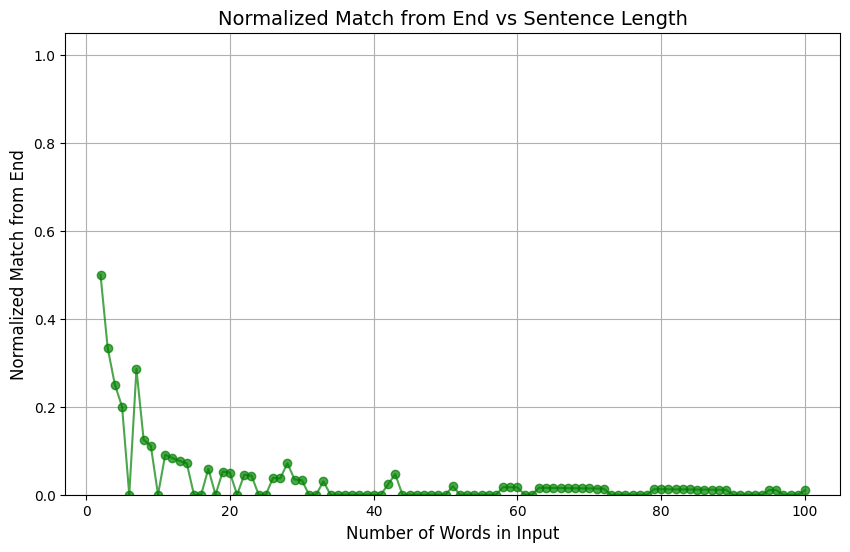

In [40]:
data6 = evaluate_and_plot(data6)